/home/wojciech/anaconda3/envs/TFTS/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/home/wojciech/anaconda3/envs/TFTS/lib/python3.10/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Probe device: cuda:0
Transformer device: cuda:0
Epoch 1/20 - Loss: 2910.0192
Epoch 2/20 - Loss: 2140.0780
Epoch 3/20 - Loss: 1610.1501
Epoch 4/20 - Loss: 1260.1841
Epoch 5/20 - Loss: 1041.1851
Epoch 6/20 - Loss: 912.2103
Epoch 7/20 - Loss: 841.3130
Epoch 8/20 - Loss: 805.1494
Epoch 9/20 - Loss: 787.4216
Epoch 10/20 - Loss: 779.3050
Epoch 11/20 - Loss: 775.8500
Epoch 12/20 - Loss: 774.1794
Epoch 13/20 - Loss: 773.4943
Epoch 14/20 - Loss: 773.0397
Epoch 15/20 - Loss: 772.5735
Epoch 16/20 - Loss: 771.7429
Epoch 17/20 - Loss: 771.2936
Epoch 18/20 - Loss: 771.0346
Epoch 19/20 - Loss: 770.5353
Epoch 20/20 - Loss: 770.0928
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
to

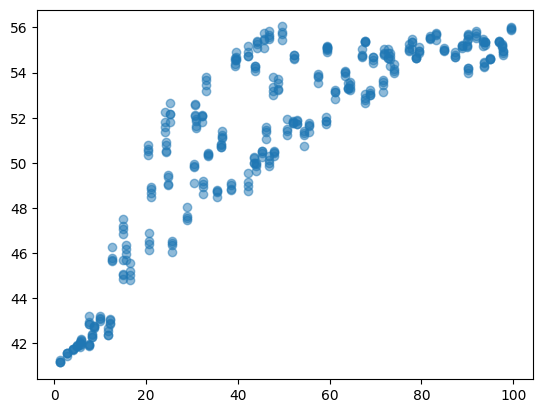

In [1]:
from torch.utils.data import DataLoader
from pytorch_lightning import Trainer
from generators.poisson_process_generator import PoissonProcessDataset
from models.vanilla_transformer import TransformerModel
from probes.linear_probe import LinearProbe
import matplotlib.pyplot as plt


checkpoint_path = "/home/wojciech/private/magisterka/TFTS/training/lightning_logs/version_8/checkpoints/transformer-epoch=154-val_loss=0.06.ckpt"

# Load the trained model
model = TransformerModel.load_from_checkpoint(checkpoint_path)

# Create the DataLoader for evaluation
val_loader = PoissonProcessDataset(batch_size=16, series_length=1000, subseries_length=50, stride=50, intensity_count=100).get_dataloader()

# Initialize the linear probe with the transformer model
probe = LinearProbe(model_path=checkpoint_path, input_dim=128)  # Assuming `d_model` is 128
# Fine-tune the linear probe using the training data (optional)
# If needed, create a train_loader like val_loader and call finetune
train_loader = PoissonProcessDataset(batch_size=16, series_length=1000, subseries_length=50, stride=50, intensity_count=1000).get_dataloader()
probe.finetune(train_loader, num_epochs=20)

# Evaluate the probe on the validation dataset
val_loss, predictions, labels = probe.evaluate(val_loader)
plt.scatter(labels, predictions, alpha=0.5)
print(f"Validation Loss (MSE): {val_loss:.4f}")


/home/wojciech/anaconda3/envs/TFTS/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/home/wojciech/anaconda3/envs/TFTS/lib/python3.10/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Probe device: cuda:0
Transformer device: cuda:0
Epoch 1/20 - Loss: 3089.9333
Epoch 2/20 - Loss: 2295.3442
Epoch 3/20 - Loss: 1731.5186
Epoch 4/20 - Loss: 1349.1592
Epoch 5/20 - Loss: 1102.9348
Epoch 6/20 - Loss: 953.0642
Epoch 7/20 - Loss: 867.6912
Epoch 8/20 - Loss: 821.7647
Epoch 9/20 - Loss: 798.8897
Epoch 10/20 - Loss: 787.5414
Epoch 11/20 - Loss: 782.0249
Epoch 12/20 - Loss: 779.3225
Epoch 13/20 - Loss: 777.6969
Epoch 14/20 - Loss: 777.4938
Epoch 15/20 - Loss: 776.3961
Epoch 16/20 - Loss: 775.3741
Epoch 17/20 - Loss: 775.5370
Epoch 18/20 - Loss: 774.9878
Epoch 19/20 - Loss: 774.6951
Epoch 20/20 - Loss: 773.7586
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
to

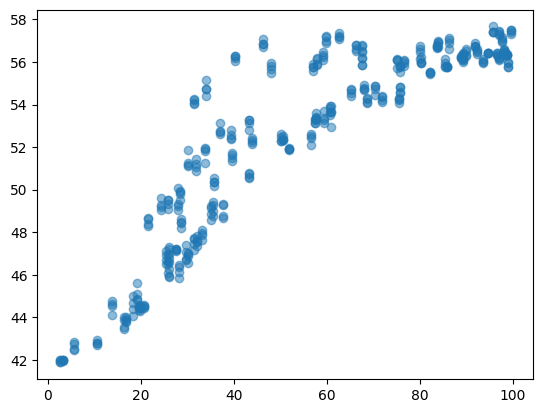

In [2]:
checkpoint_path = "/home/wojciech/private/magisterka/TFTS/training/lightning_logs/version_8/checkpoints/transformer-epoch=154-val_loss=0.06.ckpt"

# Load the trained model
model = TransformerModel.load_from_checkpoint(checkpoint_path)

# Create the DataLoader for evaluation
val_loader = PoissonProcessDataset(batch_size=16, series_length=1000, subseries_length=50, stride=50, intensity_count=100).get_dataloader()

# Initialize the linear probe with the transformer model
probe = LinearProbe(model_path=checkpoint_path, input_dim=128, benchmark=True)  # Assuming `d_model` is 128
# Fine-tune the linear probe using the training data (optional)
# If needed, create a train_loader like val_loader and call finetune
train_loader = PoissonProcessDataset(batch_size=16, series_length=1000, subseries_length=50, stride=50, intensity_count=1000).get_dataloader()
probe.finetune(train_loader, num_epochs=20)

# Evaluate the probe on the validation dataset
val_loss, predictions, labels = probe.evaluate(val_loader)
plt.scatter(labels, predictions, alpha=0.5)
print(f"Validation Loss (MSE): {val_loss:.4f}")